In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [62]:
gdp_df = pd.read_csv("../data/un_gdp.csv")

In [63]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [64]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [65]:
gdp_df = pd.read_csv("../data/un_gdp.csv", skipfooter=2, engine='python')

In [66]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [67]:
gdp_df = gdp_df.drop(["Value Footnotes"], axis=1)
gdp_df = gdp_df.rename({"Country or Area": "Country", "Value": "GDP_Per_Capita"}, axis="columns")

In [8]:
print("gdp_df shape: ", gdp_df.shape)
print(gdp_df.dtypes)

gdp_df shape:  (6868, 3)
Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


In [9]:
gdp_df['Year'] = pd.to_datetime(gdp_df['Year'], format='%Y')

In [10]:
gdp_df.dtypes

Country                   object
Year              datetime64[ns]
GDP_Per_Capita           float64
dtype: object

In [11]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019-01-01,2065.036398
1,Afghanistan,2018-01-01,2033.779002
2,Afghanistan,2017-01-01,2058.383832
3,Afghanistan,2016-01-01,2057.062164
4,Afghanistan,2015-01-01,2068.265904


In [12]:
gdp_df['Year'].value_counts() 
# Number of countries increases over the years.

2017-01-01    238
2016-01-01    238
2015-01-01    238
2014-01-01    238
2013-01-01    238
2012-01-01    237
2011-01-01    237
2018-01-01    237
2010-01-01    236
2009-01-01    236
2008-01-01    235
2007-01-01    235
2006-01-01    235
2005-01-01    234
2004-01-01    234
2003-01-01    233
2002-01-01    233
2001-01-01    232
2000-01-01    231
2019-01-01    231
1999-01-01    224
1998-01-01    223
1997-01-01    223
1996-01-01    221
1995-01-01    221
1994-01-01    214
1993-01-01    212
1992-01-01    209
1991-01-01    208
1990-01-01    207
Name: Year, dtype: int64

In [13]:
gdp_df['Country'].value_counts() 
# Number of countries increases over the years.

Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

In [14]:
print("Year added and country")
for x in range(1990,2022):
    tmp_merge = pd.merge(gdp_df[gdp_df['Year'] == str(x) + '-01-01'], 
                         gdp_df[gdp_df['Year'] == str(x + 1)  + '-01-01'], on='Country', how='right')
    added_countries = tmp_merge[tmp_merge.GDP_Per_Capita_x.isnull()]['Country'].tolist()   
    if (added_countries): print("\t", str(x+1), ', '.join(added_countries))

Year added and country
	 1991 Hungary
	 1992 Slovak Republic
	 1993 Cambodia, Estonia, Small states
	 1994 Bosnia and Herzegovina, West Bank and Gaza
	 1995 Croatia, Kuwait, Latvia, Lithuania, Maldives, Moldova, Serbia
	 1997 Montenegro, San Marino
	 1999 Libya
	 2000 CuraÃ§ao, Kosovo, Liberia, Other small states, Palau, Qatar, Timor-Leste
	 2001 SÃ£o TomÃ© and Principe
	 2002 Afghanistan
	 2004 Nauru
	 2006 Cayman Islands
	 2009 Sint Maarten (Dutch part)
	 2011 Turks and Caicos Islands
	 2013 Djibouti


In [15]:
gdp_2014 = gdp_df[gdp_df['Year'] == '2014-01-01'].reset_index()

In [16]:
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

(array([52., 27., 14., 32., 21., 12.,  5., 11.,  9.,  4.,  6.,  6.,  4.,
         5.,  4.,  6.,  4.,  3.,  3.,  2.,  3.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   822.61045782,   3936.44092566,   7050.2713935 ,  10164.10186133,
         13277.93232917,  16391.76279701,  19505.59326485,  22619.42373269,
         25733.25420053,  28847.08466837,  31960.91513621,  35074.74560405,
         38188.57607189,  41302.40653973,  44416.23700757,  47530.06747541,
         50643.89794325,  53757.72841109,  56871.55887893,  59985.38934676,
         63099.2198146 ,  66213.05028244,  69326.88075028,  72440.71121812,
         75554.54168596,  78668.3721538 ,  81782.20262164,  84896.03308948,
         88009.86355732,  91123.69402516,  94237.524493  ,  97351.35496084,
        100465.18542868, 103579.01589652, 106692.84636435, 109806.67683219,
        112920.50730003, 116034.

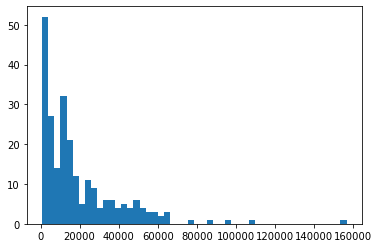

In [17]:
plt.hist(gdp_2014['GDP_Per_Capita'], 50)
# right skewed

In [18]:
gdp_2014.sort_values(by="GDP_Per_Capita", ascending=False).head(5)
# Top 5 countries by GDP in 2014

,index,Country,Year,GDP_Per_Capita
128,3721,"Macao SAR, China",2014-01-01,156514.133850
127,3691,Luxembourg,2014-01-01,108760.916030
177,5138,Qatar,2014-01-01,95578.416973
189,5464,Singapore,2014-01-01,87808.663157
19,561,Bermuda,2014-01-01,77361.104881


In [19]:
gdp_2014.sort_values(by="GDP_Per_Capita").head(5)
# Bottom 5 countries by GDP in 2014

,index,Country,Year,GDP_Per_Capita
36,1047,Central African Republic,2014-01-01,822.610458
28,827,Burundi,2014-01-01,886.235777
130,3781,Malawi,2014-01-01,1027.208496
49,1422,Dem. Rep. Congo,2014-01-01,1029.790785
156,4528,Niger,2014-01-01,1127.615541


In [20]:
gdp_1990_2017 = gdp_df[(gdp_df['Year'] == '1990-01-01') | (gdp_df['Year'] == '2017-01-01')]
gdp_pivoted = gdp_1990_2017.pivot(index='Country', columns='Year', values='GDP_Per_Capita').dropna()

In [21]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted['2017-01-01'] - gdp_pivoted['1990-01-01']) / gdp_pivoted['1990-01-01']

In [22]:
print("Number of countries with negative growth from 1990 to 2017:", gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].shape[0])

Number of countries with negative growth from 1990 to 2017: 17


In [23]:
print("Country with the highest growth rate from 1990 to 2017:", 
      gdp_pivoted[gdp_pivoted['Percent_Change'] == gdp_pivoted['Percent_Change'].max()].index[0])

Country with the highest growth rate from 1990 to 2017: Equatorial Guinea


In [24]:
print("Country with the second highest growth rate from 1990 to 2017:", 
      gdp_pivoted.sort_values(by='Percent_Change', ascending=False).iloc[1,:].name)

Country with the second highest growth rate from 1990 to 2017: China


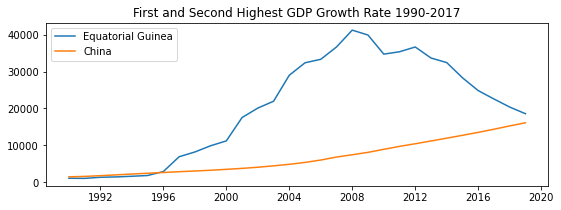

In [25]:
plt.figure(figsize=(9, 3))

plt.plot(gdp_df[gdp_df['Country'] == 'Equatorial Guinea']['Year'],
         gdp_df[gdp_df['Country'] == 'Equatorial Guinea']['GDP_Per_Capita'],
         label="Equatorial Guinea")
plt.plot(gdp_df[gdp_df['Country'] == 'China']['Year'],
         gdp_df[gdp_df['Country'] == 'China']['GDP_Per_Capita'],
         label="China")

ax = plt.gca()
ax.legend()
plt.title("First and Second Highest GDP Growth Rate 1990-2017")
print()

# China has a smooth growth rate from 1990 to 2017 while Equatorial Guinea has a very sharp rise and 
#  then a decide but maintains the highest growth rate of any country.

In [26]:
continents = pd.read_csv("../data/continents.csv")

In [27]:
gdp_df = pd.merge(continents, gdp_df, on="Country").dropna()

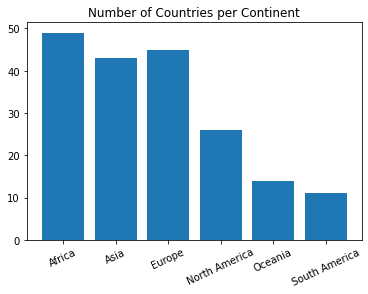

In [28]:
plt.bar(sorted(gdp_df["Continent"].unique()),
        gdp_df[["Continent", "Country"]].groupby("Continent").nunique()["Country"])
plt.xticks(rotation=25)
plt.title("Number of Countries per Continent")
print()

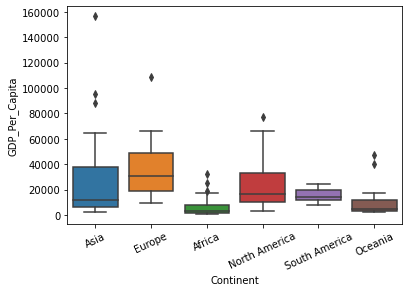

In [29]:
# Create a seaborn boxplot showing GDP per capita in 2014 split out by continent.
ax = sns.boxplot(x="Continent", y="GDP_Per_Capita", data=gdp_df[gdp_df['Year'] == '2014-01-01'])
plt.xticks(rotation=25)
print()
# Asia hos three countries that are high outliers. Europe seems the best off overall with one high outlier.
# Africa is the poorest continent with even the high outliers being within the norm of other continents. 
# North America is heavily skewed right with median GDP noticably below the mean. South America is the flatest of the
# distributions with no outlies and all countries being relatively poor. Oceania is the second poorest continent
# overall with a right skewed population and two high outlying countries, median is well below the mean. 

In [50]:
internet_df = pd.read_csv("../data/un_internet.csv", on_bad_lines='warn', skipfooter=180, engine='python')

Skipping line 4675: ',' expected after '"'. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


In [51]:
internet_df.head(5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [52]:
internet_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [53]:
internet_df = internet_df.drop(["Value Footnotes"], axis=1)
internet_df = internet_df.rename({"Country or Area": "Country", "Value": "Internet_Users_Pct"}, axis="columns")

In [54]:
internet_df.shape

(4495, 3)

In [55]:
internet_df.dtypes

Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object

In [38]:
# internet_df['Year'] = pd.to_datetime(internet_df['Year'], format='%Y')

In [ ]:
# What is the first year that has a nonzero internet users percentage reported? 1960

Text(0.5, 1.0, 'Mean Percent of Internet Users Worldwide')

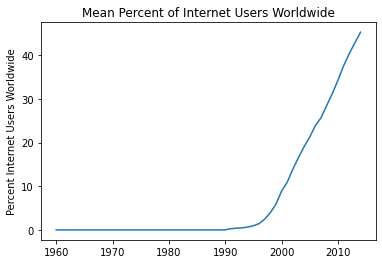

In [61]:
plt.plot(sorted(internet_df["Year"].unique()), internet_df.groupby("Year")["Internet_Users_Pct"].mean())
plt.ylabel('Percent Internet Users Worldwide')
plt.title("Mean Percent of Internet Users Worldwide")

In [68]:
# Merge gdp_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. 
# Keep only countries and years that appear in both tables.
# Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. 
#     Some countries have slightly different names in the internet use and gdp dataframes. 
#     For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." 
#     in the internet use dataframe. Find as many instances like this 
#     as you can and resolve them so that when merging you keep the maximum number of countries possible.

In [88]:
# set(gdp_df['Country'].unique()) - set(internet_df['Country'].unique())
# set(internet_df['Country'].unique()) - set(gdp_df['Country'].unique())
gdp_df[gdp_df['Country'] ==  'Cabo Verde'] =  'Cape Verde'
gdp_df[gdp_df['Country'] ==  'Brunei'] =  'Brunei Darussalam'
gdp_df[gdp_df['Country'] ==  'Central African Republic'] =  'Central African Rep.'
gdp_df[gdp_df['Country'] ==  "CÃ´te d'Ivoire"] = "Cote d'Ivoire"
gdp_df[gdp_df['Country'] ==  'Dem. Rep. Congo'] =  'Congo (Democratic Republic of the)'
gdp_df[gdp_df['Country'] ==  'Dominican Republic'] =  'Dominican Rep.'
gdp_df[gdp_df['Country'] ==  'Hong Kong SAR, China'] =  'Hong Kong, China'
gdp_df[gdp_df['Country'] ==  'Iran'] =  'Iran (Islamic Rep. of)'
gdp_df[gdp_df['Country'] ==  'Korea'] =  'Korea (Rep. of)'
gdp_df[gdp_df['Country'] ==  'Kyrgyz Republic'] =  'Kyrgyzstan'
gdp_df[gdp_df['Country'] ==  'Lao PDR'] =  'Lao P.D.R.'
gdp_df[gdp_df['Country'] ==  'Macao SAR, China'] =  'Macao, China'
gdp_df[gdp_df['Country'] ==  'Micronesia'] =  'Micronesia (Fed. States of)'
gdp_df[gdp_df['Country'] ==  'North Macedonia'] =  'T.F.Y.R. Macedonia'
gdp_df[gdp_df['Country'] ==  'St. Kitts and Nevis'] =  'Saint Kitts and Nevis'
gdp_df[gdp_df['Country'] ==  'St. Lucia'] =  'Saint Lucia'
gdp_df[gdp_df['Country'] ==  'SÃ£o TomÃ© and Principe'] =  'Sao Tome and Principe'
gdp_df[gdp_df['Country'] ==  'The Bahamas'] =  'Bahamas'
gdp_df[gdp_df['Country'] ==  'The Gambia'] =  'Gambia'
gdp_df[gdp_df['Country'] ==  'Vietnam'] =  'Viet Nam'

In [86]:
gdp_df[gdp_df['Country'] ==  'Korea']

,Country,Year,GDP_Per_Capita
3160,Korea,2019,42878.817297
3161,Korea,2018,42105.279934
3162,Korea,2017,41110.644804
3163,Korea,2016,39963.61047
3164,Korea,2015,38974.0041
3165,Korea,2014,38109.51662
3166,Korea,2013,37159.634786
3167,Korea,2012,36184.05796
3168,Korea,2011,35521.371433
3169,Korea,2010,34523.164514


In [87]:
internet_df[internet_df['Country'] ==  'Korea (Rep. of)']

,Country,Year,Internet_Users_Pct
2193,Korea (Rep. of),2014,84.330000
2194,Korea (Rep. of),2013,84.770000
2195,Korea (Rep. of),2012,84.070000
2196,Korea (Rep. of),2011,83.759120
2197,Korea (Rep. of),2010,83.700000
2198,Korea (Rep. of),2009,81.600000
2199,Korea (Rep. of),2008,81.000000
2200,Korea (Rep. of),2007,78.800000
2201,Korea (Rep. of),2006,78.100000
2202,Korea (Rep. of),2005,73.500000
